In [1]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.integrate import quad

In [2]:
%run ./special_functions.ipynb

## Using sympy to take derivatives

In [20]:
from sympy.abc import symbols
from sympy import diff, exp, cos, sqrt, atan, sin, latex
from sympy.abc import Q, T, X
T_m = symbols('T_m')

In [21]:
f = (1-cos(sqrt(1+Q**4)*T))/(1+Q**4)*cos(Q*X) # the integrand
f_x = diff(f, X)
f_tt = diff(f, T, 2)

In [22]:
f_x

-Q*(1 - cos(T*sqrt(Q**4 + 1)))*sin(Q*X)/(Q**4 + 1)

In [25]:
print(latex(f_tt))

\cos{\left(Q X \right)} \cos{\left(T \sqrt{Q^{4} + 1} \right)}


In [23]:
f_tt

cos(Q*X)*cos(T*sqrt(Q**4 + 1))

In [110]:
Brq4t1 = 1 + Q**4 + 1/T_m**2
Sqrt1q4 = sqrt(1 + Q**4)
M_sympy = (sin(T*Sqrt1q4-2*atan(T_m*Sqrt1q4)))/(Sqrt1q4*Brq4t1) + \
            exp(-T/T_m)*(T/Brq4t1 + 2/(T_m*Brq4t1**2))

In [123]:
print(latex(M_sympy_tt))

\frac{- \sqrt{Q^{4} + 1} \sin{\left(T \sqrt{Q^{4} + 1} - 2 \operatorname{atan}{\left(T_{m} \sqrt{Q^{4} + 1} \right)} \right)} - \frac{2 e^{- \frac{T}{T_{m}}}}{T_{m}} + \frac{\left(T + \frac{2}{T_{m} \left(Q^{4} + 1 + \frac{1}{T_{m}^{2}}\right)}\right) e^{- \frac{T}{T_{m}}}}{T_{m}^{2}}}{Q^{4} + 1 + \frac{1}{T_{m}^{2}}}


In [111]:
M_sympy

(T/(Q**4 + 1 + T_m**(-2)) + 2/(T_m*(Q**4 + 1 + T_m**(-2))**2))*exp(-T/T_m) + sin(T*sqrt(Q**4 + 1) - 2*atan(T_m*sqrt(Q**4 + 1)))/(sqrt(Q**4 + 1)*(Q**4 + 1 + T_m**(-2)))

In [112]:
M_sympy_tt = diff(M_sympy, T, 2)

In [113]:
M_sympy_tt

(-sqrt(Q**4 + 1)*sin(T*sqrt(Q**4 + 1) - 2*atan(T_m*sqrt(Q**4 + 1))) - 2*exp(-T/T_m)/T_m + (T + 2/(T_m*(Q**4 + 1 + T_m**(-2))))*exp(-T/T_m)/T_m**2)/(Q**4 + 1 + T_m**(-2))

## Functions

In [7]:
def M(q, t, t_m):
    brq4tau1 = 1 + q**4 + 1/t_m**2
    sqrt1q4 = np.sqrt(1+q**4)
    return (np.sin(t*sqrt1q4-2*np.arctan(t_m*sqrt1q4)))/(sqrt1q4*brq4tau1) + \
            np.exp(-t/t_m)*(t/brq4tau1 + 2/(t_m*brq4tau1**2))

def M_tt(q, t, t_m):
    brq4tau1 = 1 + q**4 + 1/t_m**2
    sqrt1q4 = np.sqrt(1+q**4)
    return (-sqrt1q4*np.sin(t*sqrt1q4 - 2*np.arctan(t_m*sqrt1q4)) - \
            np.exp(-t/t_m)/t_m*(2 - (t+2/(t_m*brq4tau1))/t_m))/brq4tau1

def M_tt_old(q, t, t_m):
    return float(M_sympy_tt.evalf(subs={Q: q, T: t, T_m: t_m}))

#infinite flexible shell/rod_on_a_flexible_platform
def integrand(q, tau, tau_m, alpha):
    return np.exp(-q**2/(4*alpha**2)) * M(q, tau, tau_m)

def integrand_eps(q, tau, tau_m, alpha):
    return np.exp(-q**2/(4*alpha**2)) * M(q, tau, tau_m)*q

def integrand_acc(q, tau, tau_m, alpha):
    return np.exp(-q**2/(4*alpha**2)) * M_tt(q, tau, tau_m)

def w(eta, tau, params):
    alpha, tau_m, I_star = params
    val, _ = quad(integrand, 0, 20, args=(tau, tau_m, alpha), 
                  weight='cos', wvar=eta, limit=100, epsabs=1e-5)
    return I_star/(tau_m**2*alpha*np.sqrt(np.pi)) * val

def eps_w(eta, tau, params):
    alpha, tau_m, I_star = params
    val, _ = quad(integrand_eps, 0, 20, args=(tau, tau_m, alpha), 
                  weight='sin', wvar=eta, limit=100, epsabs=1e-5)
    return -I_star/(tau_m**2*alpha*np.sqrt(np.pi)) * val

def acc_w(eta, tau, params):
    alpha, tau_m, I_star = params
    val, _ = quad(integrand_acc, 0, 20, args=(tau, tau_m, alpha), 
                  weight='cos', wvar=eta, limit=400, epsabs=1e-4)
    return I_star/(tau_m**2*alpha*np.sqrt(np.pi)) * val



In [12]:
#impulse force Heaviside*Dirac
def integrand2(q,t):
    return (1-np.cos(np.sqrt(1+q**4)*t))/(1+q**4)

def integrand2_eps(q, t):
    return q*(np.cos(t*np.sqrt(1+q**4)))/(1+q**4)

def integrand2_acc(q, t):
    return np.cos(t*np.sqrt(1+q**4))

def w2(x, t, params=None):
    val, _ = quad(integrand2, 0, 20, args=(t), 
                weight='cos', wvar=x, limit=500, epsabs=1e-5)
    return val/(2*np.pi)

def eps_w2(x, t, params=None):
    val, _ = quad(integrand2_eps, 0, 30, args=(t), 
                weight='sin', wvar=x, limit=500, epsabs=1e-5)
    return val/(2*np.pi)

def acc_w2(x, t, params=None):
    val, _ = quad(integrand2_acc, 0, 25, args=(t), 
                weight='cos', wvar=x, limit=1500, epsabs=1e-4)
    return val/(2*np.pi)


## Изгибные волны в бесконечной цилиндрической оболочке

In [13]:
tau = np.linspace(0, 8, 101)
alpha = 1
tau_m = 2
I_star = 1
params = (alpha, tau_m, I_star)
etas = [3, 2, 1, 0]
w_solution = solve(w, etas, tau, params)

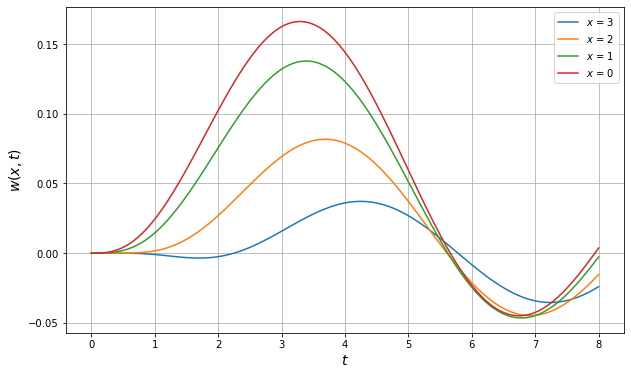

In [14]:
figname1 = 'transverse_osc_par=(1,2,1),etas=[3,2,1,0]'
plot_results(tau, w_solution, etas, figname=None, 
             lgd=r'$x$', xl=r'$t$', yl=r'$w(x, t)$', title=None, fontsize=14)

In [15]:
w_solution_eps = solve(eps_w, etas, tau, params)

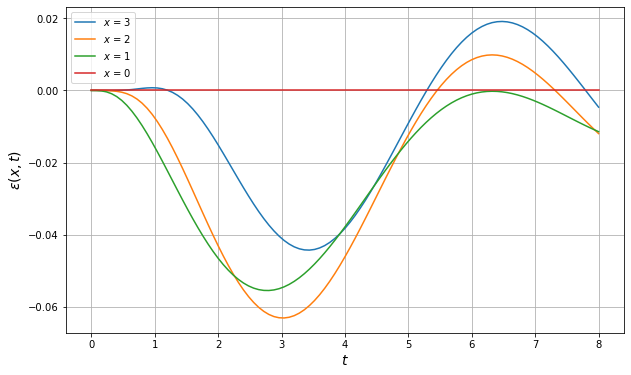

In [16]:
figname2 = 'transverse_osc_EPS_par=(1,2,1),etas=[3,2,1,0]'
plot_results(tau, w_solution_eps, etas, figname=None, 
             lgd=r'$x$', xl=r'$t$', yl=r'$\varepsilon(x, t)$', title=None, fontsize=14)

In [17]:
w_solution_acc = solve(acc_w, etas, tau, params)

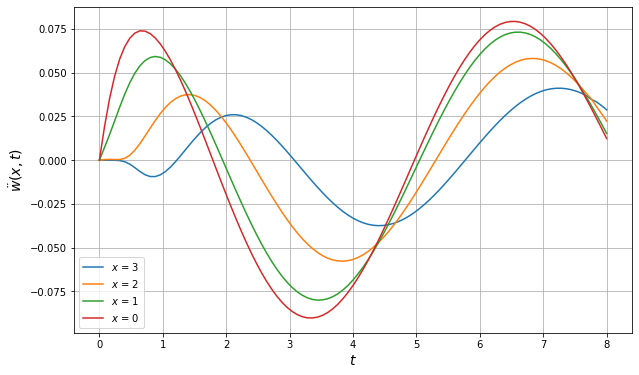

In [19]:
figname3 = 'transverse_osc_ACC_par=(1,2,1),etas=[3,2,1,0]'
plot_results(tau, w_solution_acc, etas, figname=figname3, 
             lgd=r'$x$', xl=r'$t$', yl=r'$\ddot{w}(x, t)$', title=None, fontsize=14)

## Точечная нагрузка

In [81]:
t = np.linspace(0, 8, 201)
etas = [3, 2, 1, 0]
w2_sol = solve(w2, etas, t, ())

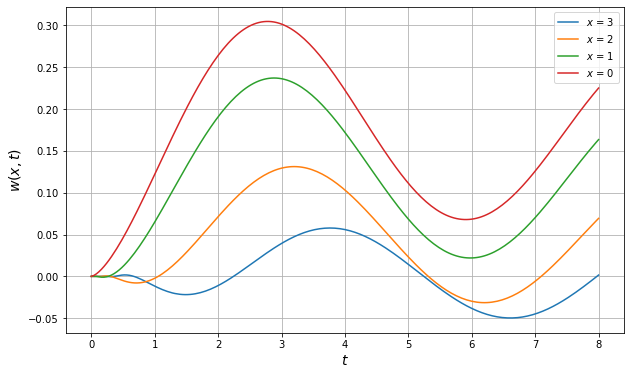

In [82]:
figname4 = 'transverse_osc_point_force,x=[3, 2, 1, 0]'
plot_results(t, w2_sol, etas, figname=None, 
            lgd=r'$x$', xl=r'$t$', yl=r'$w(x,t)$', title=None, fontsize=14)

In [83]:
t_eps = np.linspace(0.5, 8, 201)
w2_sol_eps = solve(eps_w2, etas, t_eps, ())

C:\Users\imjob\AppData\Local\Temp/ipykernel_9732/3711732628.py:26: IntegrationWarning: The maximum number of subdivisions (500) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  val, _ = quad(integrand2_eps, 0, 30, args=(t),


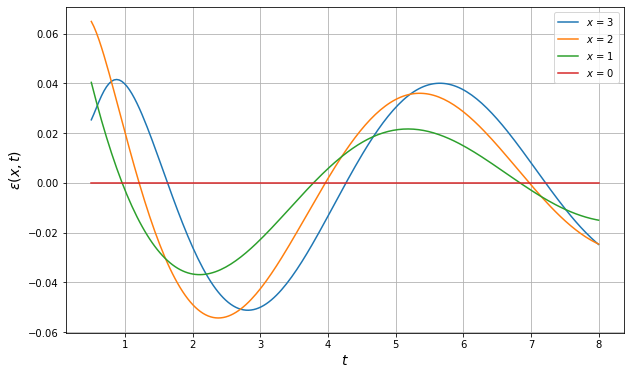

In [84]:
figname5 = 'transverse_osc_EPS_point_force,x=[3, 2, 1, 0]'
plot_results(t_eps, w2_sol_eps, etas, figname=None,
            lgd=r'$x$', xl=r'$t$', yl=r'$\varepsilon(x,t)$', title=None, fontsize=14)

In [97]:
t_acc = np.linspace(0.5, 8, 201)
w2_sol_acc = solve(acc_w2, etas, t_acc, ())

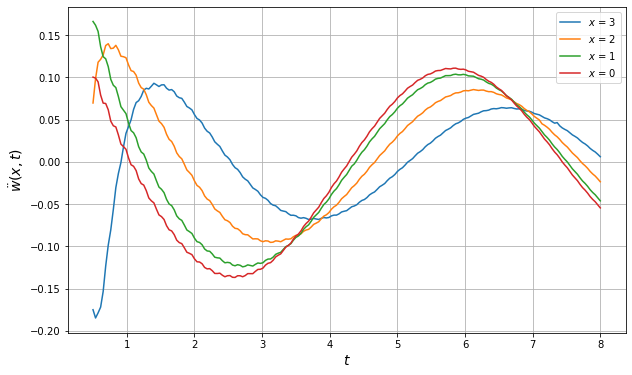

In [100]:
figname6 = 'transverse_osc_ACC_point_force,x=[3, 2, 1, 0]'
plot_results(t_acc, w2_sol_acc, etas, figname=None, 
            lgd=r'$x$', xl=r'$t$', yl=r'$\ddot{w}(x,t)$', title=None, fontsize=14)

### Точечная нагрузка: сечения

In [4]:
def T_sections(x_range, function, time_sections, params):
    u_res = []
    for time in time_sections:
        u_res.append(np.array([function(x, time, params) for x in x_range]))
    u_resnp = np.array(u_res)
    return u_resnp

In [10]:
x = np.linspace(0, 15, 101)
times = [0.2, 1, 4, 9]
w_sections = T_sections(x, w2, times, ())

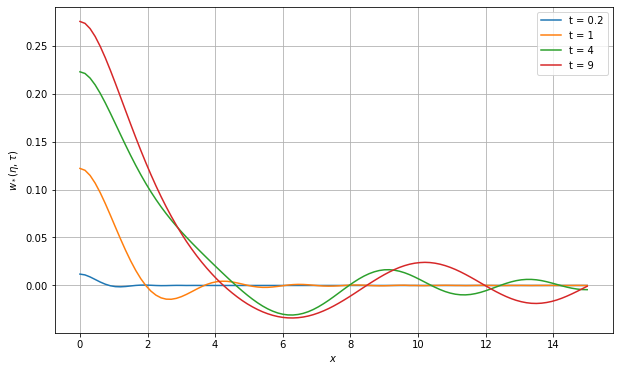

In [11]:
figname1 = 'transverse_osc_point_force,times=[0, 1, 4, 9]'
plot_results(x, w_sections, times, figname=None, 
             lgd=r't', xl=r'$x$', yl=r'$w_*(\eta,\tau)$', title=None)